<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


## File informations from different releases

In [ ]:
!ls /content/drive/MyDrive/KKNV

HBN_R10_Pheno.csv   HBN_R3_Pheno.csv  HBN_R6_Pheno.csv	HBN_R9_Pheno.csv
HBN_R1_1_Pheno.csv  HBN_R4_Pheno.csv  HBN_R7_Pheno.csv	Pheno.csv
HBN_R2_1_Pheno.csv  HBN_R5_Pheno.csv  HBN_R8_Pheno.csv	Query1.csv


In [ ]:
# info on whether there are phenotypical full files and imaging data availale
file1 = pd.read_csv(
    working_path.joinpath('HBN_R1_1_Pheno.csv'),
    index_col=None
)
file2 = pd.read_csv(
    working_path.joinpath('HBN_R2_1_Pheno.csv'),
    index_col=None
)
file3 = pd.read_csv(
    working_path.joinpath('HBN_R3_Pheno.csv'),
    index_col=None
)
file4 = pd.read_csv(
    working_path.joinpath('HBN_R4_Pheno.csv'),
    index_col=None
)
file5 = pd.read_csv(
    working_path.joinpath('HBN_R5_Pheno.csv'),
    index_col=None
)
file6 = pd.read_csv(
    working_path.joinpath('HBN_R6_Pheno.csv'),
    index_col=None
)
file7 = pd.read_csv(
    working_path.joinpath('HBN_R7_Pheno.csv'),
    index_col=None
)
file8 = pd.read_csv(
    working_path.joinpath('HBN_R8_Pheno.csv'),
    index_col=None
)
file9 = pd.read_csv(
    working_path.joinpath('HBN_R9_Pheno.csv'),
    index_col=None
)
file10 = pd.read_csv(
    working_path.joinpath('HBN_R10_Pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno = pd.concat([file1, file2])
fullpheno = pd.concat([fullpheno, file3])
fullpheno = pd.concat([fullpheno, file4])
fullpheno = pd.concat([fullpheno, file5])
fullpheno = pd.concat([fullpheno, file6])
fullpheno = pd.concat([fullpheno, file7])
fullpheno = pd.concat([fullpheno, file8])
fullpheno = pd.concat([fullpheno, file9])
fullpheno = pd.concat([fullpheno, file10])

In [ ]:
fullpheno.to_csv(
    Path(working_path).joinpath('full_pheno.csv')
)

## Creating a file on MRI and full pheno information

In [6]:
# file with the identifiers that have mri imaging
fullpheno = pd.read_csv(
    working_path.joinpath('full_pheno.csv'),
    index_col=None
)

In [7]:
fullpheno.head()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [8]:
print(fullpheno.shape)
print(len(fullpheno.EID.unique()))
# there are some identifiers that are repeated in the table

(5106, 7)
4245


In [9]:
unique = []
repetition = []
for i in fullpheno.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(fullpheno.shape[0])
print(len(unique))
print(len(repetition))

5106
4245
861


In [10]:
full_no_doubles = fullpheno.drop_duplicates()

In [11]:
unique = []
repetition = []
for i in full_no_doubles.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(full_no_doubles.shape[0])
print(len(unique))
print(len(repetition))
# still there is some repetition but let's see whether something disappears when we clean data

5105
4245
860


In [12]:
full_no_doubles.groupby(['Full_Pheno']).count()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Commercial_Use
Full_Pheno,,,,,,
No,760,760,760,760,757,760
Yes,4344,4344,4344,4344,4264,4344


In [13]:
pheno_mri = full_no_doubles[full_no_doubles['Full_Pheno'] == 'Yes']
print(pheno_mri.shape)

(4344, 7)


In [14]:
pheno_mri.groupby(['Sex']).count()
# Sex 1 - female, 0 - male

,Unnamed: 0,EID,Age,EHQ_Total,Commercial_Use,Full_Pheno
Sex,,,,,,
0.0,2797,2797,2797,2741,2797,2797
1.0,1547,1547,1547,1523,1547,1547


In [15]:
pheno_mri.groupby(['Commercial_Use']).count()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Full_Pheno
Commercial_Use,,,,,,
No,565,565,565,565,530,565
Yes,3779,3779,3779,3779,3734,3779


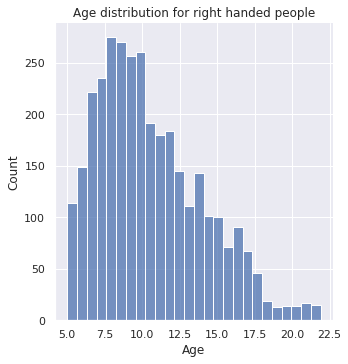

In [16]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [17]:
unique = []
repetition = []
for i in pheno_mri[pheno_mri['EHQ_Total'] >= 40].EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(pheno_mri[pheno_mri['EHQ_Total'] >= 40].shape[0])
print(len(unique))
print(len(repetition))
# There will be no repetition if we clean the data

3303
2684
619


In [ ]:
pheno_mri.to_csv(
    Path(working_path).joinpath('pheno_mri.csv')
)

## Pipeline to make the data convinient to use

In [9]:
# file with the identifiers that have mri imaging
pheno_mri = pd.read_csv(
    working_path.joinpath('pheno_mri.csv'),
    index_col=None
)

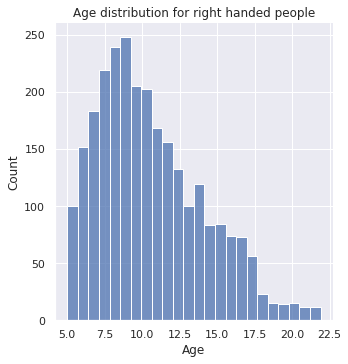

In [22]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [10]:
pheno_mri.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
pheno_mri.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [176]:
data = pd.read_csv(
    working_path.joinpath('Query1.csv'),
    index_col=None
)

In [177]:
# work on Identifiers column
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)	
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

8210
8210


**Crossreferencing to understand who has the full pheno**

In [178]:
print(pheno_mri.shape)
print(data.shape)

(3539, 6)
(8210, 88)


In [179]:
full_ids = pheno_mri.EID.values
data_ids = data.Identifiers.values.tolist()
hits = []
misses = []
indices = []
for i in data_ids:
  if i in full_ids:
    hits.append(i)
  elif i not in full_ids:
    misses.append(i)
    indices.append(data_ids.index(i))
print(len(hits))

3538


In [180]:
# One participant is missing from the data. It could be the case that the experiment is nor over.
for i in full_ids:
  if i not in hits:
    print(i)

NDARAL828WXM


In [181]:
pheno_mri[pheno_mri['EID'] == 'NDARAL828WXM']

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
2601,NDARAL828WXM,0.0,15.188569,63.34,Yes,Yes


In [182]:
data_pheno = data.copy()

In [183]:
for i in indices:
  data_pheno.drop([i], axis=0, inplace=True)

In [184]:
data_pheno.shape

(3538, 88)

Here is our reduced data frame with participant who has the full phenotypic file. Let's now choose only right handed participants.

We have 72 participants with no information on their handedness. Deleting them

In [185]:
data_pheno = data_pheno[data_pheno['EHQ,EHQ_Total'] != '.']

In [186]:
data_pheno['EHQ,EHQ_Total'] = data_pheno['EHQ,EHQ_Total'].astype(float)

In [187]:
data_pheno = data_pheno[data_pheno['EHQ,EHQ_Total'] >= 40]

In [188]:
data_pheno.shape

(2683, 88)

In [189]:
# work on Age column
data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)

<ipython-input-189-a30b02d68c6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)


In [190]:
# work on Sex column
data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)

<ipython-input-190-aaeeca34a39b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)


In [191]:
# work on Site column
data_pheno.drop(['Basic_Demos,Site'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [237]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'ConsensusDx,DX_0' + str(number)
  name_conf = 'ConsensusDx,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values

  dyslexia = []
  new_diagnosis = []
  for i in range(0, df.shape[0]):
    # if it's nan values
    if type(diagnosis[i]) == float:
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's some type of LSD and 
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] == 0:
        dyslexia.append(0)
        new_diagnosis.append(0)
      else:
        dyslexia.append(diagnosis[i])
        new_diagnosis.append('dys')
    # if it's a dot or empty spase
    elif diagnosis[i] == '.':
      dyslexia.append(0)
      new_diagnosis.append(0)
    elif diagnosis[i] == ' ':
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's an incomplete inquery
    elif 'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it's no diagnosis
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's some other disorder
    else:
      dyslexia.append(0)
      if confirmed[i] == 0:
        new_diagnosis.append(0)
      else:
        new_diagnosis.append(diagnosis[i])
  return dyslexia, new_diagnosis

In [245]:
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data_pheno, i)
  all_diagnosis['diag_%s' % i] = new_diagnosis
  all_dys['diag_%s' % i] = dyslexia

In [286]:
all_in_one = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    all_in_one.append(0)
  elif len(participant) == 1:
    all_in_one.append(participant[0])
  else:
    all_in_one.append(participant)

In [287]:
dys_in_one = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    dys_in_one.append(0)
  elif len(participant) == 1:
    dys_in_one.append(participant[0])
  else:
    dys_in_one.append(participant)

In [288]:
data_pheno['DD'] = dys_in_one
data_pheno['Diagnosis'] = all_in_one

In [281]:
for i in range(1,10):
  name_diag = 'ConsensusDx,DX_0' + str(i)
  name_conf = 'ConsensusDx,DX_0' + str(i) + '_Confirmed'
  name_code = 'ConsensusDx,DX_0' + str(i) + '_Code'
  data_pheno.drop([name_diag], axis=1, inplace=True)
  data_pheno.drop([name_conf], axis=1, inplace=True)
  data_pheno.drop([name_code], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10'], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10_Code'], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10_Confirmed'], axis=1, inplace=True)

In [290]:
data_pheno[data_pheno['DD'] == 'Incomplete'].shape

(46, 59)

In [296]:
data_pheno = data_pheno[data_pheno['DD'] != 'Incomplete']
data_pheno.shape

(2637, 59)

In [304]:
print('Control subjects')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data_pheno[data_pheno['DD'] != 0].shape[0])

Control subjects
1726
Disorders w/out DD
746
Disorders w DD
165


In [380]:
data_filtered = data_pheno[~((data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] != 0))]

In [381]:
data_filtered.shape

(1891, 59)

In [382]:
new_dtypes = []
dtypes = data_filtered.DD.values
for i in dtypes:
  if i == 0:
    new_dtypes.append(i)
  else:
    if type(i) == str:
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
      else:
        print(i)
        break
    elif type(i) == list:
      if len(i) == 2:
        name1 = i[0][46:]
        name2 = i[1][46:]
        new_dtypes.append(name1 + ' and ' + name2)
      elif len(i) == 3:
        name1 = i[0][46:]
        name2 = i[1][46:]
        name3 = i[2][46:]
        new_dtypes.append(
            name1 + ' and ' + name2 + ' and ' + name3
            )
      else:
        print(i)
        break
    else:
      print(i)
      break

In [383]:
n_dtypes = []
for i in new_dtypes:
  if i == 'Reading and Mathematics and Mathematics':
    n_dtypes.append('Reading and Mathematics')
  elif i == 'Reading and Written Expression and Mathematics':
    n_dtypes.append('Reading and Mathematics and Written Expression')
  elif i == 'Mathematics and Reading and Reading':
    n_dtypes.append('Reading and Mathematics')
  elif i == 'Reading and Mathematics ':
    n_dtypes.append('Reading and Mathematics')
  else:
    n_dtypes.append(i)

In [384]:
data_filtered['DD'] = n_dtypes

<ipython-input-384-1060c2819d63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['DD'] = n_dtypes


In [385]:
data_filtered.DD.unique()

array([0, 'Reading', 'Math', 'Writing',
       'Reading and Mathematics and Written Expression',
       'Reading and Mathematics', 'Reading and Written Expression',
       'Mathematics and Written Expression'], dtype=object)

In [386]:
data_filtered.groupby(['DD'])[['Identifiers']].count()

,Identifiers
DD,
0,1726
Math,18
Mathematics and Written Expression,1
Reading,97
Reading and Mathematics,15
Reading and Mathematics and Written Expression,13
Reading and Written Expression,11
Writing,10


In [389]:
new_diag = []
diag = data_filtered.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
  elif i == 'dys':
    new_diag.append(0)
  elif type(i) == list:
    if len(i) == 2:
      if i[0] == 'dys' and i[1] == 'dys':
        new_diag.append(0)
      elif i[0] == 'dys' and i[1] != 'dys':
        new_diag.append(i[1])
      elif i[0] != 'dys' and i[1] == 'dys':
        new_diag.append(i[0])
      else: 
        new_diag.append(i[0] + ' ' + i[1])
    elif len(i) == 3:
      if i[0] == 'dys' and i[1] == 'dys' and i[2] == 'dys':
        new_diag.append(0)
      elif i[0] == 'dys' and i[1] != 'dys' and i[2] != 'dys':
        new_diag.append(i[1] + ' ' + i[2])
      elif i[0] != 'dys' and i[1] == 'dys' and i[2] != 'dys':
        new_diag.append(i[0] + ' ' + i[2])
      elif i[0] != 'dys' and i[1] != 'dys' and i[2] == 'dys':
        new_diag.append(i[0] + ' ' + i[1])
      else:
        new_diag.append(i[0] + ' ' + i[1] + ' ' + i[2])
    else:
      name = ''
      for k in i:
        name = name + k
      new_diag.append(name)

In [395]:
n_diag = []
for i in new_diag:
  if i == 0:
    n_diag.append(0)
  elif 'ADHD' in i:
    n_diag.append('ADHD')
  elif 'Attention-Deficit' in i:
    n_diag.append('ADHD')
  elif 'Autism Spectrum' in i:
    n_diag.append('Autism')
  else:
    n_diag.append(i)

In [397]:
data_filtered['Diagnosis'] = n_diag

<ipython-input-397-137487eb167d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Diagnosis'] = n_diag


In [399]:
data_filtered.groupby(['Diagnosis'])[['Identifiers']].count()

,Identifiers
Diagnosis,
0,1765
ADHD,87
Adjustment Disorders,1
Autism,7
Developmental Coordination Disorder Language Disorder,1
Enuresis,3
Generalized Anxiety Disorder Specific Phobia,1
Language Disorder,7
Language Disorder Adjustment Disorders,1


In [400]:
# new coding will be 
# DD = 0 Diagnosis = 0 Control group
# DD = smth Diagnosis = 0 No comorbidity
# DD = smth Diagnosis = smth Comorbid
# DD = smth Diagnosis = ADHD Comorbid with ADHD, subject to exclusion
# DD = smth Diagnosis = Autism Comorbid with Autism, subject to exclusion
data_filtered.head()

,Identifiers,"Basic_Demos,Age","Basic_Demos,Sex","CELF,CELF_Total","DailyMeds,med_dose_01","DailyMeds,med_dose_02","DailyMeds,med_dose_03","DailyMeds,med_name_01","DailyMeds,med_name_02","DailyMeds,med_name_03",...,"WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd","WISC,WISC_FSIQ","WISC,WISC_PSI","WISC,WISC_VCI","WISC,WISC_VSI","WISC,WISC_WMI",DD,Diagnosis
2,NDARAA504CRN,9.165297,1,12,.,.,.,.,.,.,...,85,80,83,100,111,95,102,97,0,0
3,NDARAA947ZG5,13.627880,0,16,.,.,.,.,.,.,...,93,91,100,87,86,92,84,97,0,0
5,NDARAB055BPR,10.793862,1,11,.,.,.,.,.,.,...,94,93,98,89,100,95,97,91,0,0
6,NDARAB348EWR,5.805384,0,11,.,.,.,.,.,.,...,123,117,123,.,.,.,.,.,0,0
7,NDARAB458VK9,12.836185,0,21,.,.,.,.,.,.,...,109,95,110,102,72,108,100,94,0,0


Text(0.5, 1.0, 'Age distribution')

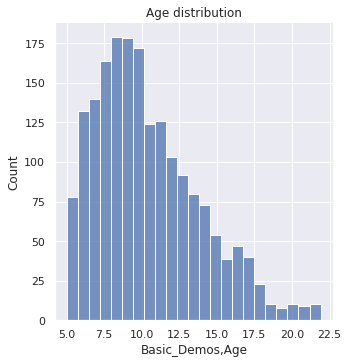

In [401]:
sns.displot(data_filtered['Basic_Demos,Age'])
pl.title('Age distribution')